In [6]:
# In this notebook, we will analyze the overall performance of a given product collection. Analysis will include sales, inventory and advertising performance.
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Data:
orders_path = '../data/processed_orders.csv'
inventory_path = '../data/inventory.csv'
advertising_path = '../data/advertising.csv'
products_path = '../data/products.csv'
collections_path = '../data/collections.csv'
categories_path = '../data/categories.csv'


# Collection:
collection = 'Oviedo'

## Sales

In [7]:
# Defining the functions for sales analysis

# Function to read and process the CSV file
def analyze_sales_data(file_path, collection_name):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert purchase_date to datetime and extract the month
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])
    df['month'] = df['purchase_date'].dt.strftime('%Y-%m')

    # Filter data based on collection name
    filtered_df = df[df['collection'] == collection_name]

    # Group by month and calculate metrics
    grouped = filtered_df.groupby('month').agg(
        Quantity_sold=('quantity', 'sum'),
        Revenue_eur=('item_price', 'sum')
    )

    # Calculate ticket price
    grouped['Ticketprice_eur'] = grouped['Revenue_eur'] / grouped['Quantity_sold']

    # Reset index to make 'month' a column
    grouped = grouped.reset_index()

    return grouped

# Function to display table and plot
def display_results(grouped_data):
    # Display the table
    print(grouped_data)

    # Plotting the graph
    plt.figure(figsize=(6, 3))
    plt.plot(grouped_data['month'], grouped_data['Revenue_eur'], marker='o')
    plt.title('Monthly Sales Revenue')
    plt.xlabel('Month')
    plt.ylabel('Sales Revenue (EUR)')
    plt.grid(True)
    plt.show()

     month  Quantity_sold  Revenue_eur  Ticketprice_eur
0  2023-01            141      14240.2       100.994326
1  2023-02             94       9337.4        99.334043
2  2023-03             56       4753.3        84.880357
3  2023-04             78       9325.7       119.560256
4  2023-05             73       8940.9       122.478082
5  2023-06             69       9013.5       130.630435
6  2023-07             52       6437.3       123.794231
7  2023-08             49       6239.9       127.344898
8  2023-09             86      10446.1       121.466279
9  2023-10             52       6583.8       126.611538


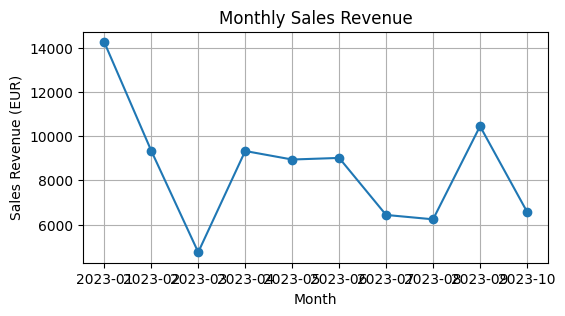

In [8]:
# Example usage
grouped_data = analyze_sales_data(orders_path, collection)
display_results(grouped_data)

## Inventory

In [11]:
# Now we will analyze the inventory performance

import pandas as pd

def read_and_process_inventory(file_path_inventory, file_path_collections, collection):
    # Read the inventory and collections data
    inventory_df = pd.read_csv(file_path_inventory)
    collections_df = pd.read_csv(file_path_collections)

    # Convert 'month' to datetime
    inventory_df['month'] = pd.to_datetime(inventory_df['month'], format='%d.%m.%Y')

    # Filter for the latest date
    latest_date = inventory_df['month'].max()
    latest_inventory_df = inventory_df[inventory_df['month'] == latest_date]

    # Aggregate inventory by collection_id
    inventory_summary = latest_inventory_df.groupby('collection_id')['inventory'].sum().reset_index()

    # Join with collections data to get collection names
    final_inventory_df = pd.merge(inventory_summary, collections_df, on='collection_id', how='left')

    # Filter for the specified collection
    collection_inventory = final_inventory_df[final_inventory_df['collection'] == collection]

    return collection_inventory[['collection', 'inventory']]

In [12]:
# Example usage
inventory_analysis = read_and_process_inventory(inventory_path, collections_path, collection)
print(inventory_analysis)


  collection  inventory
4     Oviedo        423
